In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import re

In [175]:
df = pd.read_csv('tracks.csv')
dfA = pd.read_csv('artists.csv')
dfA

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,['black comedy'],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,['black comedy'],Donnell Rawlings,15


In [180]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [133]:
pop = df[['id', 'artists', 'name', 'popularity', 'explicit','release_date']]
popSort = pop.sort_values(by=['popularity'], ascending=False)
popSort.loc[df['popularity']>90,:]

,id,artists,name,popularity,explicit,release_date
93802,4iJyoBOLtHqaGxP12qzhQI,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",Peaches (feat. Daniel Caesar & Giveon),100,1,2021-03-19
93803,7lPN2DXiMsVn7XUKtOW1CS,['Olivia Rodrigo'],drivers license,99,1,2021-01-08
93804,3Ofmpyhv5UAQ70mENzB277,['Masked Wolf'],Astronaut In The Ocean,98,0,2021-01-06
92810,5QO79kh1waicV47BqGRL3g,['The Weeknd'],Save Your Tears,97,1,2020-03-20
92811,6tDDoYIxWvMLTdKpjFkc1B,['Kali Uchis'],telepatía,97,0,2020-12-04
93805,7MAibcTli4IisCtbHKrGMh,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",Leave The Door Open,96,0,2021-03-05
92813,0VjIjW4GlUZAMYd2vXMi3b,['The Weeknd'],Blinding Lights,96,0,2020-03-20
92814,6f3Slt0GbA2bPZlz0aIFXN,['Tiësto'],The Business,95,0,2020-09-16
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,['Giveon'],Heartbreak Anniversary,94,0,2020-03-27
92819,1xK1Gg9SxG8fy2Ya373oqb,"['Myke Towers', 'Juhn']",Bandido,94,0,2020-12-10


In [6]:
dfT = df[['id', 'artists', 'name', 'duration_ms', 'popularity', 'release_date']]
dfT.duration_ms = pd.to_timedelta(dfT.duration_ms, unit='ms')
dfT.rename(columns={'duration_ms':'duration_time'})#change milliseconds to days,hours,minutes

C:\Users\mike\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,artists,name,duration_time,popularity,release_date
0,35iwgR4jXetI318WEWsa1Q,['Uli'],Carve,0 days 00:02:06.903000,6,1922-02-22
1,021ht4sdgPcrDgSk7JTbKY,['Fernando Pessoa'],Capítulo 2.16 - Banquero Anarquista,0 days 00:01:38.200000,0,1922-06-01
2,07A5yehtSnoedViJAZkNnc,['Ignacio Corsini'],Vivo para Quererte - Remasterizado,0 days 00:03:01.640000,0,1922-03-21
3,08FmqUhxtyLTn6pAh6bk45,['Ignacio Corsini'],El Prisionero - Remasterizado,0 days 00:02:56.907000,0,1922-03-21
4,08y9GfoqCWfOGsKdwojr5e,['Dick Haymes'],Lady of the Evening,0 days 00:02:43.080000,0,1922
...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,['阿YueYue'],云与海,0 days 00:04:18.267000,50,2020-09-26
586668,0NuWgxEp51CutD2pJoF4OM,['ROLE MODEL'],blind,0 days 00:02:33.293000,72,2020-10-21
586669,27Y1N4Q4U3EfDU5Ubw8ws2,['FINNEAS'],What They'll Say About Us,0 days 00:03:07.601000,70,2020-09-02
586670,45XJsGpFTyzbzeWK8VzR8S,"['Gentle Bones', 'Clara Benin']",A Day At A Time,0 days 00:02:22.003000,58,2021-03-05


In [7]:
dfT.sort_values(by='duration_ms', ascending=False)#longest tracks by hour.minutes.seconds.milliseconds

,id,artists,name,duration_ms,popularity,release_date
326329,3EEv9UCeZdn4MVFv8tsO1E,['ท่านพุทธทาส'],โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,0 days 01:33:41.218000,3,1979-07-28
450241,7foc25ig7dibxvULPU2kBG,['Sound Dreamer'],Brown Noise - 90 Minutes,0 days 01:30:03.500000,50,2013-06-05
131876,6rGikpwOv3LXaHWVCYbMNC,['Various Artists'],New Year's Eve 2015 Party Hits - Full DJ Party...,0 days 01:24:02.185000,0,2014-12-19
586457,7jTxNjSwPcPjSbK8829Vno,['Sheikh Mishary Rashid Alfasay'],Surah Al-Araf,0 days 01:23:15.083000,39,2010-01-01
399471,7r86YmJo79FRcAHuVeKZp8,['Monoteque'],Tech House The Yearbook 2018 - Continuous Mix 2,0 days 01:21:04.333000,0,2018-12-16
...,...,...,...,...,...,...
1824,7bgYtpP5qxWabDHsPY8Rwc,['Louis Armstrong'],Pause Track,0 days 00:00:04,0,1925
1570,4SjlyAejCNUB4MrGM1KuVp,['Louis Armstrong'],Pause Track,0 days 00:00:03.344000,0,1925
1575,4WeyR22Ax2fF9dY0NxgjFV,['Louis Armstrong'],Pause Track,0 days 00:00:03.344000,0,1925
1441,2s6e7KLoQ5hie3Cnh73v2v,['Louis Armstrong'],Pause Track,0 days 00:00:03.344000,0,1925


In [8]:
artistsCount = df.groupby('artists').agg(count=('id', 'count'))
artistsCount.sort_values(by='count', ascending=False)#count by artists

,count
artists,
['Die drei ???'],3856
['TKKG Retro-Archiv'],2006
['Benjamin Blümchen'],1503
['Bibi Blocksberg'],1472
['Lata Mangeshkar'],1373
...,...
['Jess Penner'],1
"['Jess Ingerslev', 'Tritonus Koret']",1
"['Jess Ingerslev', 'Bendt Reiner', 'Niels Weyde', 'Tritonus Koret']",1


In [76]:
dfshort = df.iloc[:, [0,1,2,6]]
dfshort#short version of tracks

,id,name,popularity,id_artists
0,35iwgR4jXetI318WEWsa1Q,Carve,6,['45tIt06XoI0Iio4LBEVpls']
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,['14jtPCOoNZwquk5wd9DxrY']
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,['5LiOoJbxVSAMkBS2fUm3X2']
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,['5LiOoJbxVSAMkBS2fUm3X2']
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,['3BiJGZsyX9sJchTqcSA7Su']
...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,['1QLBXKM5GCpyQQSVMNZqrZ']
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,['1dy5WNgIKQU6ezkpZs4y8z']
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,['37M5pPGs6V1fchFJSgCguX']
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g..."


In [10]:
dfT = pd.read_csv('tracks.csv')
dfT#another reading of tracks in case df is corrupted 

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [77]:
dfshort = dfshort.replace(r'[^\w\s]|_', '', regex=True).reset_index()
dfshort#take out special characters from id_artists

,index,id,name,popularity,id_artists
0,0,35iwgR4jXetI318WEWsa1Q,Carve,6,45tIt06XoI0Iio4LBEVpls
1,1,021ht4sdgPcrDgSk7JTbKY,Capítulo 216 Banquero Anarquista,0,14jtPCOoNZwquk5wd9DxrY
2,2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte Remasterizado,0,5LiOoJbxVSAMkBS2fUm3X2
3,3,08FmqUhxtyLTn6pAh6bk45,El Prisionero Remasterizado,0,5LiOoJbxVSAMkBS2fUm3X2
4,4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,3BiJGZsyX9sJchTqcSA7Su
...,...,...,...,...,...
586667,586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,1QLBXKM5GCpyQQSVMNZqrZ
586668,586668,0NuWgxEp51CutD2pJoF4OM,blind,72,1dy5WNgIKQU6ezkpZs4y8z
586669,586669,27Y1N4Q4U3EfDU5Ubw8ws2,What Theyll Say About Us,70,37M5pPGs6V1fchFJSgCguX
586670,586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,4jGPdu95icCKVF31CcFKbS 5ebPSE9YI5aLeZ1Z2gkqjn


In [83]:
df_plode = dfshort.id_artists.explode().reset_index()
df_plode = df_plode.rename(columns={'id_artists': 'sep_id'})
df_plode = pd.concat([df_plode, dfT], axis=1)
df_plode
df_AT = pd.merge(df_plode,dfA,left_on='id_artists',right_on='id')

#df_AT['id'] = dfshort.loc[df_AT['index']].values
#df_AT.drop('index',axis=1, inplace=True)
df_AT

,index,sep_id,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,...,instrumentalness,liveness,valence,tempo,time_signature,id_y,followers,genres,name_y,popularity_y
0,0,45tIt06XoI0Iio4LBEVpls,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,19220222,...,0.744000,0.1510,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
1,12,45tIt06XoI0Iio4LBEVpls,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,Uli,45tIt06XoI0Iio4LBEVpls,19220222,...,0.856000,0.4360,0.402,87.921,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
2,62,45tIt06XoI0Iio4LBEVpls,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,Uli,45tIt06XoI0Iio4LBEVpls,19220222,...,0.919000,0.1050,0.396,79.895,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
3,106,45tIt06XoI0Iio4LBEVpls,4vV7uBcF2AnjNTOejBS5oL,Lenfer,0,40000,0,Uli,45tIt06XoI0Iio4LBEVpls,19220222,...,0.856000,0.0931,0.105,81.944,5,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
4,112,45tIt06XoI0Iio4LBEVpls,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,Uli,45tIt06XoI0Iio4LBEVpls,19220222,...,0.802000,0.0847,0.138,100.031,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,586649,5VGgFE9nPgMfEnYiPT5J2B,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,芝麻,5VGgFE9nPgMfEnYiPT5J2B,20200225,...,0.000000,0.0989,0.297,130.066,4,5VGgFE9nPgMfEnYiPT5J2B,929.0,['chinese viral pop'],芝麻,36
470034,586657,7vgGpuiXdNlCmc994PlMlz,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,Laureen Conrad,7vgGpuiXdNlCmc994PlMlz,20201030,...,0.973000,0.1080,0.890,68.619,4,7vgGpuiXdNlCmc994PlMlz,23.0,['instrumental lullaby'],Laureen Conrad,52
470035,586665,4MxqhahGRT4BPz1PilXGeu,0SjsIzJkZfDU7wlcdklEFR,John Browns Song,66,185250,0,Gregory Oberle,4MxqhahGRT4BPz1PilXGeu,20200320,...,0.961000,0.1110,0.386,63.696,3,4MxqhahGRT4BPz1PilXGeu,91.0,['instrumental lullaby'],Gregory Oberle,55
470036,586667,1QLBXKM5GCpyQQSVMNZqrZ,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,阿YueYue,1QLBXKM5GCpyQQSVMNZqrZ,20200926,...,0.000000,0.0648,0.211,131.896,4,1QLBXKM5GCpyQQSVMNZqrZ,896.0,['chinese viral pop'],阿YueYue,38


In [169]:
#dfT['id_artists'] = dfT['id_artists'].str.strip('[]')
#dfT['id_artists'] = dfT['id_artists'].str.strip("'")
dfRemove = df.replace(r'[^\w\s]|_', '', regex=True)#remove special characters from lists
#no_comma = no_bracket.replace("','", ' ')
#no_app = no_comma.replace("'", '')
variable_split = dfRemove['id_artists'].str.split(' ',expand=True)#expand lists into seperate columns
variable_split

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,45tIt06XoI0Iio4LBEVpls,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,14jtPCOoNZwquk5wd9DxrY,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,5LiOoJbxVSAMkBS2fUm3X2,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,5LiOoJbxVSAMkBS2fUm3X2,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3BiJGZsyX9sJchTqcSA7Su,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,1QLBXKM5GCpyQQSVMNZqrZ,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
586668,1dy5WNgIKQU6ezkpZs4y8z,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
586669,37M5pPGs6V1fchFJSgCguX,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
586670,4jGPdu95icCKVF31CcFKbS,5ebPSE9YI5aLeZ1Z2gkqjn,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [170]:
df_ida = pd.concat([df, variable_split], axis=1)#combine seperated artist id colunmn ids to track df
df_ida

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,48,49,50,51,52,53,54,55,56,57
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,None,None,None,None,None,None,None,None,None,None
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,None,None,None,None,None,None,None,None,None,None
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,None,None,None,None,None,None,None,None,None,None
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,None,None,None,None,None,None,None,None,None,None
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,None,None,None,None,None,None,None,None,None,None
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,None,None,None,None,None,None,None,None,None,None
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,None,None,None,None,None,None,None,None,None,None
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,None,None,None,None,None,None,None,None,None,None


In [182]:
merged_df = pd.merge(df_ida, dfA,  how='left', left_on=[0], right_on = ['id'])#merge artists to tracks with id_artists seperated
merged_df

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,53,54,55,56,57,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,None,None,None,None,None,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,None,None,None,None,None,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,None,None,None,None,None,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,None,None,None,None,None,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,None,None,None,None,None,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,None,None,None,None,None,1QLBXKM5GCpyQQSVMNZqrZ,896.0,['chinese viral pop'],阿YueYue,38.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,None,None,None,None,None,1dy5WNgIKQU6ezkpZs4y8z,245944.0,"['alt z', 'alternative r&b', 'bedroom pop', 'i...",ROLE MODEL,67.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,None,None,None,None,None,37M5pPGs6V1fchFJSgCguX,1168213.0,"['alt z', 'electropop', 'indie pop', 'la indie...",FINNEAS,77.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,None,None,None,None,None,4jGPdu95icCKVF31CcFKbS,45309.0,"['chill r&b', 'indie cafe pop', 'singaporean p...",Gentle Bones,58.0


In [14]:
genreCount = merged_df.groupby('genres').agg(count=('id_x', 'count'))#count genres
genreCount.sort_values(by='count', ascending=False).iloc[1:50,:]#sort without blank

,count
genres,
['hoerspiel'],8174
"['tango', 'vintage tango']",2644
"['classic bollywood', 'desi pop', 'filmi', 'sufi']",2357
"['classical', 'classical era']",2109
['kleine hoerspiel'],2085
"['baroque', 'classical', 'early music', 'german baroque']",2062
"['classic israeli pop', 'israeli rock']",2032
"['classic italian pop', 'italian adult pop']",1848
"['adult standards', 'easy listening', 'lounge']",1770


In [146]:
dfYear = df
dfYear['year'] = pd.DatetimeIndex(df['release_date']).year#create year for release date
dfYear

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021


In [167]:
dfYear = df
dfYear['year'] = pd.DatetimeIndex(df['release_date']).year#create year for release date
dfYear = dfYear.loc[dfYear.groupby(['year'])['popularity'].idxmax()].reset_index(drop=True)
dfYearS = dfYear.iloc[:, [0,1,2,6,20]].sort_values(by='year', ascending=False)#group by most popular track per year
dfYearS.iloc[41:61]

,id,name,popularity,id_artists,year
59,08mG3Y1vljYA6bvDt4Wqkj,Back In Black,85,['711MCceyCBcFnzjGY4Q7Un'],1980
58,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,['711MCceyCBcFnzjGY4Q7Un'],1979
57,5T8EDUDqKcs6OSOwEsfqG7,Don't Stop Me Now - Remastered 2011,82,['1dfeR4HaWDbWqFHLkxsg1d'],1978
56,0ofHAoxe9vBkTCp2UQIavz,Dreams - 2004 Remaster,86,['08GQAI4eElDnROBrJRGE0X'],1977
55,40riOy7x9W7GXjyGp4pjAv,Hotel California - 2013 Remaster,84,['0ECwFtbIWEVNwjlrfc6xoL'],1976
54,4u7EnebtmKWzUH433cf5Qv,Bohemian Rhapsody - Remastered 2011,83,['1dfeR4HaWDbWqFHLkxsg1d'],1975
53,7e89621JPkKaeDSTQ3avtg,Sweet Home Alabama,83,['4MVyzYMgTwdP7Z49wAZHx0'],1974
52,5MxNLUsfh7uzROypsoO5qe,Dream On,79,['7Ey4PD4MYsKc5I2dolUwbH'],1973
51,3gdewACMIVMEWVbyb8O9sY,"Rocket Man (I Think It's Going To Be A Long, L...",82,['3PhoLpVuITZKcymswpck5b'],1972
50,2TVxnKdb3tqe1nhQWwwZCO,Tiny Dancer,80,['3PhoLpVuITZKcymswpck5b'],1971


In [149]:
dfYear = df.loc[df.groupby(['year'])['popularity'].idxmax()].reset_index(drop=True)
dfYear.sort_values(by='year', ascending=False)#group by most popular track per year

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
100,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.6960,...,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,2021
99,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.8260,...,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,2020
98,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.4630,...,-8.433,1,0.0828,0.2080,0.037100,0.337,0.190,90.028,4,2019
97,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),89,200186,0,"['Billie Eilish', 'Khalid']","['6qqNVTkY8uBg9cP3Jd7DAH', '6LuN9FCkKOj5Pcnpou...",2018-04-19,0.351,0.2960,...,-10.109,0,0.0333,0.9340,0.000000,0.095,0.120,115.284,4,2018
96,0pqnGHJpmpxLKifKRmU6WP,Believer,88,204347,0,['Imagine Dragons'],['53XhwfbYqKCa1cC15pYq2q'],2017-06-23,0.776,0.7800,...,-4.374,0,0.1280,0.0622,0.000000,0.081,0.666,124.949,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,3XDharvL8vEyxdQwOQKmww,"On the Sunny Side of the Street (From ""Is Ever...",39,194320,0,['Tommy Dorsey'],['4WoGga7UeRcmjD4ufif4nG'],1925,0.678,0.1750,...,-13.021,1,0.0301,0.9690,0.001050,0.177,0.580,112.941,4,1925
3,6im7KEQl9Zfbo5LLH8eGvm,After You've Gone,23,176213,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1924,0.545,0.1890,...,-8.937,1,0.0352,0.9890,0.000013,0.249,0.772,96.058,4,1924
2,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,177133,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.614,0.0423,...,-12.033,1,0.0535,0.9960,0.002930,0.183,0.211,89.822,4,1923
1,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.6740,0.744000,0.151,0.127,104.851,3,1922


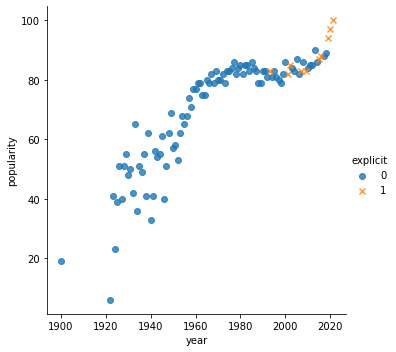

In [157]:
scatter = sns.lmplot(x='year', y='popularity', data=dfYear, fit_reg=False, hue='explicit', markers=['o', 'x'],)
plt.show()

In [183]:
genreSplit = merged_df.replace(r'[^\w\s^,]|_', '', regex=True)#remove special characters to seperate genre lists
genreSplit = genreSplit['genres'].str.split(',',expand=True)#split genres into own column
genrePiv = pd.concat([dfshort, genreSplit], axis=1)#concat artist and track tables
genrePiv

,index,id,name,popularity,id_artists,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,35iwgR4jXetI318WEWsa1Q,Carve,6,45tIt06XoI0Iio4LBEVpls,,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,021ht4sdgPcrDgSk7JTbKY,Capítulo 216 Banquero Anarquista,0,14jtPCOoNZwquk5wd9DxrY,,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte Remasterizado,0,5LiOoJbxVSAMkBS2fUm3X2,tango,vintage tango,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,08FmqUhxtyLTn6pAh6bk45,El Prisionero Remasterizado,0,5LiOoJbxVSAMkBS2fUm3X2,tango,vintage tango,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,3BiJGZsyX9sJchTqcSA7Su,adult standards,big band,easy listening,lounge,swing,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,1QLBXKM5GCpyQQSVMNZqrZ,chinese viral pop,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
586668,586668,0NuWgxEp51CutD2pJoF4OM,blind,72,1dy5WNgIKQU6ezkpZs4y8z,alt z,alternative rb,bedroom pop,indie cafe pop,indie pop,...,None,None,None,None,None,None,None,None,None,None
586669,586669,27Y1N4Q4U3EfDU5Ubw8ws2,What Theyll Say About Us,70,37M5pPGs6V1fchFJSgCguX,alt z,electropop,indie pop,la indie,pop,...,None,None,None,None,None,None,None,None,None,None
586670,586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,4jGPdu95icCKVF31CcFKbS 5ebPSE9YI5aLeZ1Z2gkqjn,chill rb,indie cafe pop,singaporean pop,None,None,...,None,None,None,None,None,None,None,None,None,None


In [55]:
gc0 = genrePiv[0].value_counts().reset_index()#count each instance of genre in new columns
gc0.columns = ['genre','cnt']
gc1 = genrePiv[1].value_counts().reset_index()
gc1.columns = ['genre','cnt']
gc2 = genrePiv[2].value_counts().reset_index()
gc2.columns = ['genre','cnt']
gc3 = genrePiv[3].value_counts().reset_index()
gc3.columns = ['genre','cnt']
gc4 = genrePiv[4].value_counts().reset_index()
gc4.columns = ['genre','cnt']
gc5 = genrePiv[5].value_counts().reset_index()
gc5.columns = ['genre','cnt']
gc6 = genrePiv[6].value_counts().reset_index()
gc6.columns = ['genre','cnt']
gc7 = genrePiv[7].value_counts().reset_index()
gc7.columns = ['genre','cnt']
gc8 = genrePiv[8].value_counts().reset_index()
gc8.columns = ['genre','cnt']
gc9 = genrePiv[9].value_counts().reset_index()
gc9.columns = ['genre','cnt']
gc10 = genrePiv[10].value_counts().reset_index()
gc10.columns = ['genre','cnt']
gc11 = genrePiv[11].value_counts().reset_index()
gc11.columns = ['genre','cnt']
gc12 = genrePiv[12].value_counts().reset_index()
gc12.columns = ['genre','cnt']
gc13 = genrePiv[13].value_counts().reset_index()
gc13.columns = ['genre','cnt']
gc14 = genrePiv[14].value_counts().reset_index()
gc14.columns = ['genre','cnt']
gc15 = genrePiv[15].value_counts().reset_index()
gc15.columns = ['genre','cnt']
gc16 = genrePiv[16].value_counts().reset_index()
gc16.columns = ['genre','cnt']
gc17 = genrePiv[17].value_counts().reset_index()
gc17.columns = ['genre','cnt']
gc18 = genrePiv[18].value_counts().reset_index()
gc18.columns = ['genre','cnt']
gc19 = genrePiv[19].value_counts().reset_index()
gc19.columns = ['genre','cnt']
gc20 = genrePiv[20].value_counts().reset_index()
gc20.columns = ['genre','cnt']
gc20.head(50)

,genre,cnt
0,shoegaze,3


In [185]:
gc0.head(50)

,genre,cnt
0,,49168
1,adult standards,25724
2,album rock,16644
3,classical,13771
4,hoerspiel,10595
5,cpop,9727
6,classic bollywood,9034
7,latin,8313
8,dance pop,7258
9,classic israeli pop,5578


In [57]:
genreCat = pd.concat([gc0,gc1,gc2,gc3,gc4,gc5,gc6,gc7,gc8,gc8,gc9,gc10,gc11,gc12,gc13,gc14,gc15,gc16,gc17,gc18,gc19,gc20])#Concat genre counts
genreCat.columns = ['genre','cnt']
genreTotal = genreCat.groupby('genre').sum('cnt')#Add all counts together
genreTotal.sort_values(by='cnt', ascending=False).iloc[1:50,:].reset_index()#display top genres with blank column ommitted

,cnt
genre,
rock,34959
adult standards,25724
classic rock,20889
mellow gold,19586
soft rock,18802
album rock,16644
folk rock,15569
filmi,15246
vocal jazz,14431


In [187]:
genreTotal.sort_values(by='cnt', ascending=False).iloc[1:50,:].reset_index()#display top genres with blank column ommitted

,genre,cnt
0,rock,34959
1,adult standards,25724
2,classic rock,20889
3,mellow gold,19586
4,soft rock,18802
5,album rock,16644
6,folk rock,15569
7,filmi,15246
8,vocal jazz,14431
9,classical,13771


In [158]:
#genAvg = merged_df.groupby(['genres'])['popularity_x'].mean()
#genAvg.columns = ['genres', 'pop_avg']
artAvg = merged_df.groupby(0) \
       .agg({'id_x':'size', 'popularity_x':'mean'}).reset_index()#.rename(columns={'id_x':'count','popularity_x':'pop_avg'})
artAvg = artAvg.loc[artAvg['id_x']>20,:]
#genAvg = merged_df.groupby('genres', as_index=False)['popularity_x'].agg(['count','mean'])
artAvg = pd.merge(artAvg, dfA,  how='left', left_on=[0], right_on = ['id'])
artAvg.sort_values(by='popularity_x', ascending=False).iloc[1:50,:]

,0,id_x,popularity_x,id,followers,genres,name,popularity
5124,6qqNVTkY8uBg9cP3Jd7DAH,40,75.900000,6qqNVTkY8uBg9cP3Jd7DAH,41792604.0,"['electropop', 'pop']",Billie Eilish,92.0
2198,2tIP7SsRs7vjIcLrU85W8J,21,75.714286,2tIP7SsRs7vjIcLrU85W8J,1624015.0,['australian hip hop'],The Kid LAROI,90.0
1566,246dkjvS1zLTtiykXe5h60,44,74.886364,246dkjvS1zLTtiykXe5h60,32167665.0,"['dfw rap', 'melodic rap', 'rap']",Post Malone,93.0
1620,28gNT5KBp7IjEOQoevXf9N,29,74.655172,28gNT5KBp7IjEOQoevXf9N,8342103.0,"['colombian pop', 'reggaeton colombiano']",Camilo,90.0
3693,4q3ewBCX7sLwd24euuV69X,78,73.910256,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98.0
4676,6AgTAQt8XS6jRWi4sX7w49,21,73.238095,6AgTAQt8XS6jRWi4sX7w49,3657199.0,['chicago rap'],Polo G,91.0
1365,1mcTU81TzQhprhouKaTkpq,32,72.750000,1mcTU81TzQhprhouKaTkpq,4438013.0,"['puerto rican pop', 'trap latino']",Rauw Alejandro,93.0
2089,2kCcBybjl3SAtIcwdWpUe3,31,72.451613,2kCcBybjl3SAtIcwdWpUe3,6754746.0,"['emo rap', 'lgbtq+ hip hop']",Lil Peep,88.0
4793,6LuN9FCkKOj5PcnpouEgny,23,71.652174,6LuN9FCkKOj5PcnpouEgny,13728298.0,"['alternative r&b', 'pop']",Khalid,92.0
3677,4oUHIQIBe0LHzYfvXNW4QM,38,70.921053,4oUHIQIBe0LHzYfvXNW4QM,1678738.0,"['contemporary country', 'deep talent show']",Morgan Wallen,88.0


In [173]:
artAvg = df.groupby('artists').agg({'id':'size', 'popularity':'mean'}).reset_index()
artAvg = artAvg.loc[artAvg['id']>20,:]
artAvg.sort_values(by='popularity', ascending=False).iloc[0:50,:]

,artists,id,popularity
41723,['Harry Styles'],26,77.846154
13030,['Billie Eilish'],33,76.454545
80325,['Post Malone'],27,74.222222
10695,['Bad Bunny'],45,73.888889
71833,['NF'],31,71.000000
70772,['Morgan Wallen'],37,70.864865
62492,['Luke Combs'],21,70.761905
41031,['Halsey'],21,69.000000
46435,['James Arthur'],23,68.304348
102138,['Travis Scott'],38,68.289474


In [127]:
topArt = dfA.sort_values(by='followers', ascending=False).iloc[0:24,:]
topArt

,id,followers,genres,name,popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,78900234.0,"['pop', 'uk pop']",Ed Sheeran,92
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"['pop', 'post-teen pop']",Ariana Grande,95
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
144488,7dGJo4pcD2V6oG8kP0tJRR,43747833.0,"['detroit hip hop', 'hip hop', 'rap']",Eminem,94
313508,5pKCCKE2ajJHZ9KAiaK11H,42244011.0,"['barbadian pop', 'dance pop', 'pop', 'post-te...",Rihanna,92
126658,6qqNVTkY8uBg9cP3Jd7DAH,41792604.0,"['electropop', 'pop']",Billie Eilish,92
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
126339,53XhwfbYqKCa1cC15pYq2q,33665795.0,"['modern rock', 'rock']",Imagine Dragons,89
144496,1dfeR4HaWDbWqFHLkxsg1d,33483326.0,"['classic rock', 'glam rock', 'rock']",Queen,89


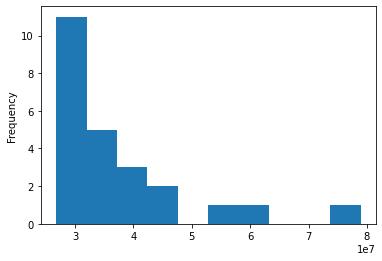

In [128]:
fig, ax = plt.subplots()
ax = topArt['followers'].plot.hist()
plt.show()

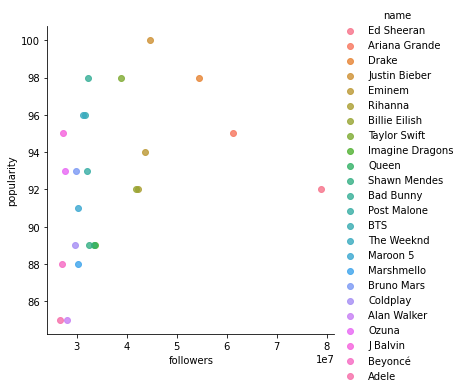

In [101]:
popChart = sns.lmplot(x = 'followers', y='popularity', data=topArt, hue='name', fit_reg=False)
plt.show()

In [189]:
genreTotal.to_csv('genrecount.csv')

In [78]:
genreCat.to_csv('genreCat.csv', index=False)

In [ ]:
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-600k-tracks